<a href="https://colab.research.google.com/github/TharikH/deep-learning/blob/main/dl_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import copy

In [23]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [24]:
num_train_samples = X_train.shape[0]
num_size = X_train.shape[1] * X_train.shape[2]
num_test_samples = X_test.shape[0]

In [25]:
num_size

784

plot 1 sample image for each class

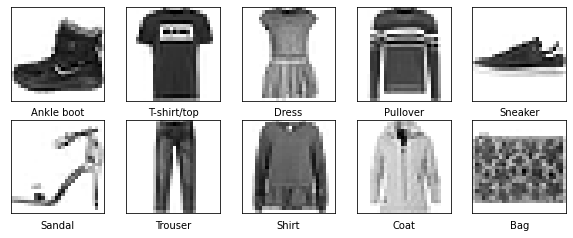

In [26]:
d=set()
plt.figure(figsize=(10,10))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
k=0
for i in range(num_train_samples):
  if Y_train[i] not in d:
    d.add(Y_train[i])
    plt.subplot(5,5,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
    k+=1
    if k == 10:
      break

plt.show()


In [27]:
#parameters 



In [28]:
#class having all required activations

class Activations():
  def __init__(self):
    self.activation_dict={
        "sigmoid":self.sigmoid,
        "softmax":self.softmax,
        "tanh":self.tanh
    }
    self.derivative_dict={
        "sigmoid":self.sigmoidDerivative,
        "softmax":self.softmaxDerivative,
        "tanh":self.tanhDerivative
    }

  def activate(self, activation_function = "sigmoid"):
    return self.activation_dict[activation_function]

  def derivate(self,activation_function = "sigmoid"):
    return self.derivative_dict[activation_function]

  def sigmoid(self, x):
    z = x.copy()
    z[x < 0] = np.exp(x[x < 0])/(1 + np.exp(x[x<0]))
    z[x >= 0] = 1/(1+np.exp(-x[x >= 0]))
    return z

  def softmax(self, x):
    max_element = np.max(x,axis=0)
    z = np.exp(x - max_element)
    total = sum(z)
    z = z/total
    return z
  
  def tanh(self, x):
    return np.tanh(x)

  def tanhDerivative(self, x):
    z = self.tanh(x)
    return 1 - z**2

  def softmaxDerivative(self,x):
    pass
  
  def sigmoidDerivative(self,x):
    z = self.sigmoid(x)
    return  z*(1 - z)

In [29]:
# class having all losses and its derivatives
class Loss():
  def __init__(self):
    pass
  def crossEntropy(self ,Y_hat, Y):
    loss=0
    num_samples = Y_hat.shape[1]
    for i in range(num_samples):
      loss+=np.log(Y_hat[:,i][Y[i]])

    return -loss/num_samples

  def findOneHotVector(self,Y_hat, Y):
    vector = np.zeros(Y_hat.shape)
    for i in range(Y_hat.shape[1]):
      vector[:,i][Y[i]] = 1
    
    return vector



  def crossEntropyDerivative(self,Y_hat, Y):
    derivative = np.zeros(Y_hat.shape)
    for i in range(Y_hat.shape[1]):
      derivative[:,i][Y[i]] = 1/(Y_hat[:,i][Y[i]])
    return derivative
    

In [30]:
# class having all the weight initializations
class WeightInit():
  def __init__(self,weight_name):
    self.weight_name = weight_name
    self.weight_dict={
        "zero":self.zeroInit,
        "random":self.randomInit,
        "xavier":self.xavierInit
    }

  def initializeWeight(self):
    return self.weight_dict[self.weight_name]
    
  
  def zeroInit(self, shape, flag=0):
    x = np.zeros(shape)
    return x

  def randomInit(self, shape, flag=0):
    x = np.random.normal(loc=0,scale=1,size=shape)
    return x

  
  def xavierInit(self, shape, flag=0):
    x = np.random.randn(*shape) * np.sqrt(2/shape[0]) if flag == 0 else self.zeroInit(shape)
    return x

  


In [31]:
# Base class for all neural networks

class NeuralNetwork():
  def __init__(self):
    pass
  def getParameters(self):
    pass
  def feedforward():
    pass
  def backpropogation():
    pass
  def test(self):
    pass
  def train(self):
    pass


In [44]:
# classes having all the optimizers
class Optimizer():
  def __init__(self,optimizer_name="gd"):
    self.optimizer_name = optimizer_name
    self.history = 0
    self.optimizer_dict={
        "gd":self.gradient_descent,
        "sgd":self.gradient_descent,
        "momentum":self.momentum,
        "nestrov":self.nesterov,
        "rmsprop":self.rmsprop,
        "adam" : self.adam,
        "nadam" : self.nadam
    }

  def optimize(self):
    return self.optimizer_dict[self.optimizer_name]
    
  
  def gradient_descent(self, nn, X, Y, loss, lr, epochs, batch_size, max_iteration,indexes_for_batch,parameter = 0):

    num_data = X.shape[1]

    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        X_batch = X[:,indexes_for_batch[batch:batch + batch_size]]
        Y_batch = Y[indexes_for_batch[batch:batch + batch_size]]
        for i in range(max_iteration):
          # self.W,self.b = self.initializeWeights()
          a_values,h_values = nn.forwardpropogation(X_batch)
          delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
          # print(np.sum(delta_W[0], axis = 0))
          for j in range(nn.num_hidden_layer + 1):
            nn.W[j] = nn.W[j] - lr * delta_W[nn.num_hidden_layer - j]
            nn.b[j] = nn.b[j] - lr * delta_b[nn.num_hidden_layer - j]

      Y_hat = nn.feedforward(X)
      loss_value = loss.crossEntropy(Y_hat,Y)
      print(f"epoch: {epoch} => loss = {loss_value}")
  [0]

  def momentum(self, nn, X, Y, loss, lr, epochs, batch_size, max_iteration,indexes_for_batch,parameter = 0.9):
    num_data = X.shape[1]
    ut_w,ut_b = nn.initializeWeights("zero")
    beta = parameter

    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        X_batch = X[:,batch:batch + batch_size]
        Y_batch = Y[batch:batch+batch_size]
        for i in range(max_iteration):
          # self.W,self.b = self.initializeWeights()
          a_values,h_values = nn.forwardpropogation(X_batch)
          delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
          # print(np.sum(delta_W[0], axis = 0))
          for j in range(nn.num_hidden_layer + 1):
            ut_w[j] = beta*ut_w[j] + delta_W[nn.num_hidden_layer - j]
            ut_b[j] = beta*ut_b[j] + delta_b[nn.num_hidden_layer - j] 

            nn.W[j] = nn.W[j] - lr * ut_w[j]
            nn.b[j] = nn.b[j] - lr * ut_b[j]

      Y_hat = nn.feedforward(X)
      loss_value = loss.crossEntropy(Y_hat,Y)
      print(f"epoch: {epoch} => loss = {loss_value}")


  def nesterov(self, nn, X, Y, loss, lr, epochs, batch_size, max_iteration,indexes_for_batch,parameter = 0.9):
    num_data = X.shape[1]
    ut_w,ut_b = nn.initializeWeights("zero")
    beta = parameter


    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        X_batch = X[:,batch:batch + batch_size]
        Y_batch = Y[batch:batch+batch_size]
        for i in range(max_iteration):
          # self.W,self.b = self.initializeWeights()
          a_values,h_values = nn.forwardpropogation(X_batch)

          old_W = copy.deepcopy(nn.W)
          old_b = copy.deepcopy(nn.b)
          
          for k in range(nn.num_hidden_layer + 1):
            nn.W[k] = nn.W[k] - beta *  ut_w[k]
            nn.b[k] = nn.b[k] - beta *  ut_b[k]

          
          delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
          # print(np.sum(delta_W[0], axis = 0))
          for j in range(nn.num_hidden_layer + 1):
            ut_w[j] = beta*ut_w[j] + delta_W[nn.num_hidden_layer - j]
            ut_b[j] = beta*ut_b[j] + delta_b[nn.num_hidden_layer - j] 

            nn.W[j] = old_W[j] - lr * ut_w[j]
            nn.b[j] = old_b[j] - lr * ut_b[j]

      Y_hat = nn.feedforward(X)
      loss_value = loss.crossEntropy(Y_hat,Y)
      print(f"epoch: {epoch} => loss = {loss_value}")
    


  def rmsprop(self, nn, X, Y, loss, lr, epochs, batch_size, max_iteration,indexes_for_batch,parameter = 0.9,epsilon = 0.1):
    num_data = X.shape[1]
    vt_w,vt_b = nn.initializeWeights("zero")
    beta = parameter

    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        X_batch = X[:,batch:batch + batch_size]
        Y_batch = Y[batch:batch+batch_size]
        for i in range(max_iteration):
          # self.W,self.b = self.initializeWeights()
          a_values,h_values = nn.forwardpropogation(X_batch)
          delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
          # print(np.sum(delta_W[0], axis = 0))
          for j in range(nn.num_hidden_layer + 1):
            vt_w[j] = beta*vt_w[j] + (1 - beta) * np.multiply(delta_W[nn.num_hidden_layer - j],delta_W[nn.num_hidden_layer - j]) 
            vt_b[j] = beta*vt_b[j] + (1 - beta) * np.multiply(delta_b[nn.num_hidden_layer - j],delta_b[nn.num_hidden_layer - j])

            nn.W[j] = nn.W[j] - np.divide(lr * delta_W[nn.num_hidden_layer - j],np.sqrt(vt_w[j] + epsilon))
            nn.b[j] = nn.b[j] - np.divide(lr * delta_b[nn.num_hidden_layer - j],np.sqrt(vt_b[j] + epsilon))

      Y_hat = nn.feedforward(X)
      loss_value = loss.crossEntropy(Y_hat,Y)
      print(f"epoch: {epoch} => loss = {loss_value}")
    
  def adam(self, nn, X, Y, loss, lr, epochs, batch_size, max_iteration,indexes_for_batch,parameter = 0.9,epsilon = 0.1, parameter2 = 0.999):
    num_data = X.shape[1]
    vt_w,vt_b = nn.initializeWeights("zero")
    mt_w,mt_b = nn.initializeWeights("zero")
    beta1 = parameter
    beta2 = parameter2
    t=0

    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        t+=1
        X_batch = X[:,batch:batch + batch_size]
        Y_batch = Y[batch:batch+batch_size]
        for i in range(max_iteration):
          # self.W,self.b = self.initializeWeights()
          a_values,h_values = nn.forwardpropogation(X_batch)
          delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
          # print(np.sum(delta_W[0], axis = 0))
          for j in range(nn.num_hidden_layer + 1):
            mt_w[j] = beta1 * mt_w[j] + (1 - beta1) * delta_W[nn.num_hidden_layer - j]
            mt_b[j] = beta1 * mt_b[j] + (1 - beta1) * delta_b[nn.num_hidden_layer - j]

            mt_w_dash = mt_w[j] / (1 - beta1 ** t)
            mt_b_dash = mt_b[j] / (1 - beta1 ** t)


            vt_w[j] = beta2*vt_w[j] + (1 - beta2) * np.multiply(delta_W[nn.num_hidden_layer - j],delta_W[nn.num_hidden_layer - j]) 
            vt_b[j] = beta2*vt_b[j] + (1 - beta2) * np.multiply(delta_b[nn.num_hidden_layer - j],delta_b[nn.num_hidden_layer - j])

            vt_w_dash = vt_w[j] / (1 - beta2 ** t)
            vt_b_dash = vt_b[j] / (1 - beta2 ** t)           

            nn.W[j] = nn.W[j] - np.divide(lr * mt_w_dash,np.sqrt(vt_w_dash + epsilon))
            nn.b[j] = nn.b[j] - np.divide(lr * mt_b_dash,np.sqrt(vt_b_dash + epsilon))

      Y_hat = nn.feedforward(X)
      loss_value = loss.crossEntropy(Y_hat,Y)
      print(f"epoch: {epoch} => loss = {loss_value}")
    
  def nadam(self, nn, X, Y, loss, lr, epochs, batch_size, max_iteration,indexes_for_batch,parameter = 0.9,epsilon = 0.1, parameter2 = 0.999):
    num_data = X.shape[1]
    vt_w,vt_b = nn.initializeWeights("zero")
    mt_w,mt_b = nn.initializeWeights("zero")
    beta1 = parameter
    beta2 = parameter2
    t=0

    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        t+=1
        X_batch = X[:,batch:batch + batch_size]
        Y_batch = Y[batch:batch+batch_size]
        for i in range(max_iteration):
          # self.W,self.b = self.initializeWeights()
          a_values,h_values = nn.forwardpropogation(X_batch)
          delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
          # print(np.sum(delta_W[0], axis = 0))
          for j in range(nn.num_hidden_layer + 1):
            mt_w[j] = beta1 * mt_w[j] + (1 - beta1) * delta_W[nn.num_hidden_layer - j]
            mt_b[j] = beta1 * mt_b[j] + (1 - beta1) * delta_b[nn.num_hidden_layer - j]

            mt_w_dash = mt_w[j] / (1 - beta1 ** t)
            mt_b_dash = mt_b[j] / (1 - beta1 ** t)


            vt_w[j] = beta2*vt_w[j] + (1 - beta2) * np.multiply(delta_W[nn.num_hidden_layer - j],delta_W[nn.num_hidden_layer - j]) 
            vt_b[j] = beta2*vt_b[j] + (1 - beta2) * np.multiply(delta_b[nn.num_hidden_layer - j],delta_b[nn.num_hidden_layer - j])

            vt_w_dash = vt_w[j] / (1 - beta2 ** t)
            vt_b_dash = vt_b[j] / (1 - beta2 ** t)           

            w_update_numerator = lr * (beta1 * mt_w_dash + ((1 - beta1)* delta_W[nn.num_hidden_layer - j]/(1 - beta1 ** t)))
            b_update_numerator = lr * (beta1 * mt_b_dash + ((1 - beta1)* delta_b[nn.num_hidden_layer - j]/(1 - beta1 ** t)))

            nn.W[j] = nn.W[j] - np.divide(w_update_numerator,np.sqrt(vt_w_dash + epsilon))
            nn.b[j] = nn.b[j] - np.divide(b_update_numerator,np.sqrt(vt_b_dash + epsilon))

      Y_hat = nn.feedforward(X)
      loss_value = loss.crossEntropy(Y_hat,Y)
      print(f"epoch: {epoch} => loss = {loss_value}")
    

In [45]:
# Neural Network for this particular neural network

class NN(NeuralNetwork):
  def __init__(self, num_samples = 60000, input_size = 784, output_size = 10, num_hidden_layer = 3, hidden_layer_size=np.array([4, 4, 4]), data_name = "Fashion_mnsit", hidden_layer_activation="sigmoid", output_layer_activation="softmax", weight_name="xavier"):
    self.num_samples = num_samples
    self.input_size = input_size
    self.output_size = output_size
    self.num_hidden_layer = num_hidden_layer
    self.hidden_layer_size = hidden_layer_size
    self.W, self.b = self.initializeWeights(weight_name)
    self.hidden_layer_activation = hidden_layer_activation
    self.output_layer_activation = output_layer_activation
    self.activation_function = Activations()
    self.activate_hidden = self.activation_function.activate(hidden_layer_activation)
    self.activate_hidden_derivative = self.activation_function.derivate(hidden_layer_activation)
    self.activate_output = self.activation_function.activate(output_layer_activation)
    self.parameters = {
        "data_name":data_name,
        "num_samples":num_samples,
        "input_size":input_size,
        "output_size":output_size,
        "num_hidden_layer":num_hidden_layer,
        "hidden_layer_size":hidden_layer_size,
        "hidden_layer_activation":hidden_layer_activation,
        "output_layer_activation":output_layer_activation,
        "weight_init":weight_name
    }

  def getParameters(self):
    return self.parameters

  def initializeWeights(self, weight_name):
    W = []
    b= []
    input_size = self.input_size
    weight_init = WeightInit(weight_name).initializeWeight()
    for i in range(self.num_hidden_layer):
      output_size = self.hidden_layer_size[i]
      W.append(weight_init((input_size, output_size ),0))
      b.append(weight_init((output_size, 1 ),1))
      input_size = output_size
    
    output_size = self.output_size

    W.append(weight_init((input_size, output_size),0))
    b.append(weight_init((output_size, 1),1))

    return W, b

  def calculateAccuracy(self, X, Y):
    Y_hat = self.feedforward(X)
    size = Y_hat.shape[1]
    score=0
    for i in range(size):
      if(np.argmax(Y_hat[:,i]) ==  Y[i]):
          score+=1

    return score/size * 100

  def feedforward(self, X):
    a = self.W[0].T @ X + self.b[0]
    hidden_layer_input = self.activate_hidden(a)

    for i in range(1,self.num_hidden_layer):
      a=self.W[i].T @ hidden_layer_input + self.b[i]
      hidden_layer_output=self.activate_hidden(a)
      hidden_layer_input = hidden_layer_output

    a=self.W[self.num_hidden_layer].T @ hidden_layer_input + self.b[self.num_hidden_layer]
    output = self.activate_output(a)

    return output


  def forwardpropogation(self, X):
    a_values=[]
    h_values=[]

    a = self.W[0].T @ X + self.b[0]
    hidden_layer_input = self.activate_hidden(a)
    
    a_values.append(a)
    h_values.append(hidden_layer_input)

    for i in range(1,self.num_hidden_layer):
      a=self.W[i].T @ hidden_layer_input + self.b[i]
      hidden_layer_output=self.activate_hidden(a)
      hidden_layer_input = hidden_layer_output
      a_values.append(a)
      h_values.append(hidden_layer_input)

    a=self.W[self.num_hidden_layer].T @ hidden_layer_input + self.b[self.num_hidden_layer]
    output = self.activate_output(a)
    a_values.append(a)
    h_values.append(output)

    return a_values,h_values

  def backpropogation(self, X, Y, a_values, h_values, loss):
    size = len(h_values)
    data_size = Y.shape[0]
    delta_ak = -(loss.findOneHotVector(h_values[size - 1],Y) - h_values[size - 1])
    delta_W=[]
    delta_b=[]

    for k in range(size - 1,0,-1):
      delta_wk = h_values[k-1] @ delta_ak.T
      delta_bk = np.sum(delta_ak,axis=1)
      delta_W.append(delta_wk/data_size)
      delta_b.append(delta_bk.reshape(delta_bk.shape[0],1)/data_size)

      delta_hk = self.W[k] @ delta_ak
      # print(delta_hk.shape)
      # print(self.activation_function.sigmoidDerivative(a_values[k-1]).shape)
      delta_ak = np.multiply(self.activate_hidden_derivative(a_values[k-1]),delta_hk)

    delta_wk = X @ delta_ak.T
    delta_bk = np.sum(delta_ak,axis=1)
    delta_W.append(delta_wk/data_size)
    delta_b.append(delta_bk.reshape(delta_bk.shape[0],1)/data_size)

    return delta_W,delta_b
  
  def training(self, X, Y, epochs =10 , loss_name="cross-entropy",optimizer_name="gd", max_iteration = 1, lr=0.01, batch_size=32,parameter=0.9):
    loss = Loss()
    optimize = Optimizer(optimizer_name).optimize()
    
    num_data = X.shape[1]
    np.random.seed(1)
    indexes_for_batch = np.arange(num_data)
    np.random.shuffle(indexes_for_batch)
    optimize(self, X, Y, loss, lr, epochs, batch_size, max_iteration, indexes_for_batch,parameter=0.9)

    print(f'train accuracy: {self.calculateAccuracy(X,Y)}')

In [46]:
nn = NN(hidden_layer_size=np.array([64,64,64]))
num_train_samples = 60000
X = X_train[:num_train_samples,:].reshape(num_train_samples,num_size).T
Y = Y_train[:num_train_samples]
# print(X.shape)
nn.training(X/255,Y,batch_size=32,lr=0.01,epochs=10,optimizer_name="nadam");

a = nn.feedforward(X)
# print(a,Y)

# print(a,Y)


epoch: 0 => loss = 1.3182002210064225
epoch: 1 => loss = 0.9162971448213866
epoch: 2 => loss = 0.7360371151582377
epoch: 3 => loss = 0.6467685073564801
epoch: 4 => loss = 0.5964834603285464
epoch: 5 => loss = 0.5601151239647009
epoch: 6 => loss = 0.5297551178911728
epoch: 7 => loss = 0.503103531285148
epoch: 8 => loss = 0.48061358819213934
epoch: 9 => loss = 0.46174747185740406
train accuracy: 83.58


In [ ]:
a=np.array([1,2,3,4,6])
# np.sum(a,axis=1)
# b=np.array([1,0,0,0,1])
# a[b]
# np.sum(a[b])
a[0:2]

array([1, 2])

In [ ]:
60000/64

937.5

In [ ]:
a = np.array([1,2,3])
b = np.array([[2,3,4],[2,3,4]])
l=[a,b]
l

[array([1, 2, 3]), array([[2, 3, 4],
        [2, 3, 4]])]

In [ ]:
p=copy.deepcopy(l)
l[1][1][1]=5

In [ ]:
p

[array([1, 2, 3]), array([[2, 3, 4],
        [2, 3, 4]])]